Basic Data Sample:
    symbol     marketCap  trailingPE  priceToBook  dividendYield  \
0  1101.TW  249658621952   36.032608     1.051813         0.0303   
1  1102.TW  159595200512   13.353116     0.897684         0.0467   
2  1103.TW   11893036032   69.423070     0.548532         0.0282   
3  1104.TW   20875132928   10.201342     0.927678         0.0591   
4  1108.TW    6597229056   13.145161     1.301085         0.0625   

   enterpriseValue  fiftyTwoWeekHigh  fiftyTwoWeekLow  
0     402605080576          35.60000        30.800000  
1     191472500736          46.00000        38.600000  
2      13917068288          19.60000        16.950000  
3      19301074944          36.42157        24.656862  
4       8957839360          17.55000        13.400000  


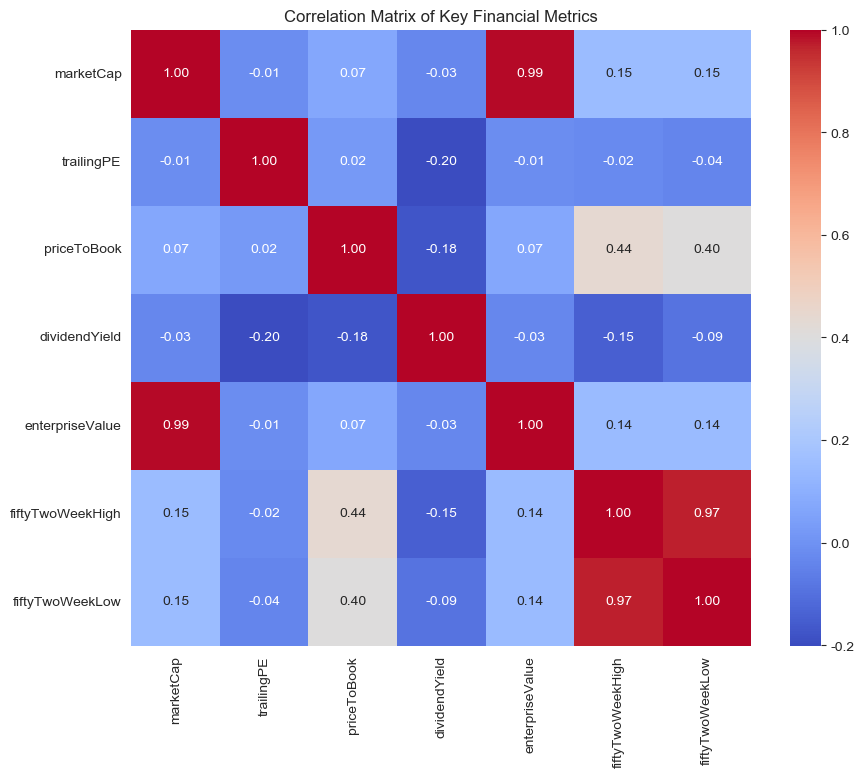

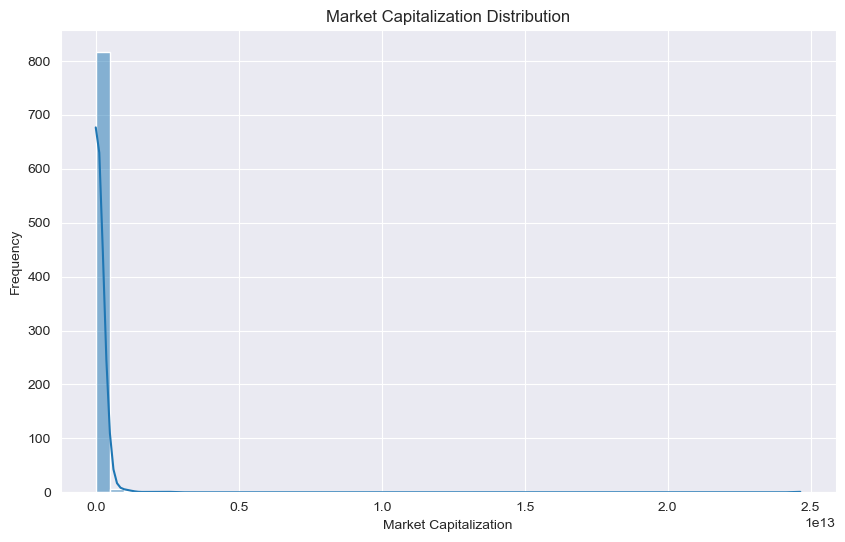

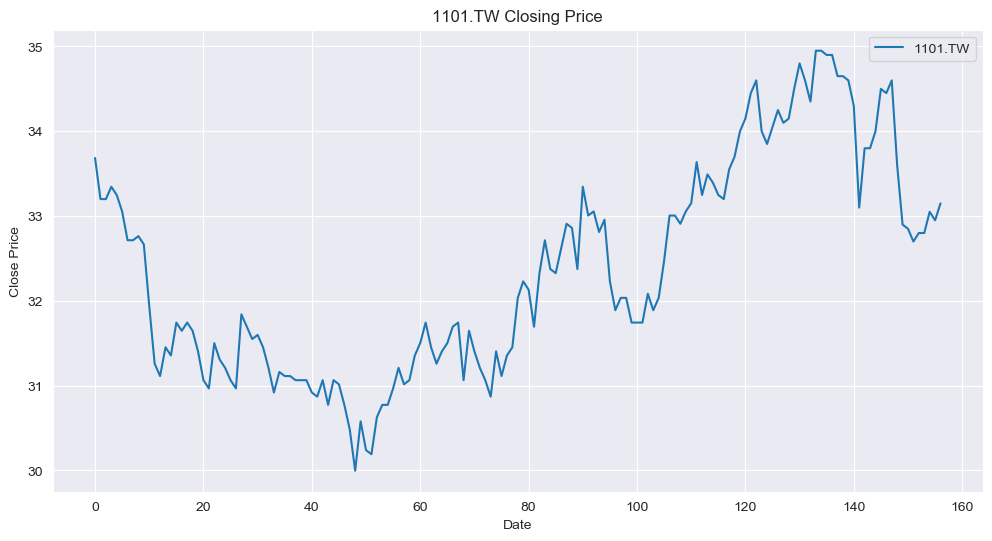

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Matplotlib 的中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 读取台股公司代码
with open("stock_list.txt", "r") as file:
    stock_list = [line.strip() for line in file.readlines()]

# 台股上市公司的股票代码列表
# tickers 列表存储每个 Ticker 对象
tickers = [yf.Ticker(stock) for stock in stock_list]

# 用于存储所有公司基本面数据的 DataFrame
fundamental_data = pd.DataFrame()
# 用于存储所有公司交易数据的 DataFrame
price_data = pd.DataFrame()

# 获取每家公司的基本面数据和交易数据
for stock in tickers:
    try:
        info = stock.info
        history = stock.history(period="ytd")  # 获取过去12个月的交易数据，替换为支持的 period
        if history.empty:
            continue
        
        # 提取基本面数据
        df_info = pd.DataFrame.from_dict(info, orient='index').T
        df_info['symbol'] = stock.ticker
        fundamental_data = pd.concat([fundamental_data, df_info], ignore_index=True)
        
        # 提取交易数据
        history['symbol'] = stock.ticker
        price_data = pd.concat([price_data, history], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for {stock.ticker}: {e}")

# 数据清洗
# 基本面数据清洗
fundamental_data = fundamental_data[['symbol', 'marketCap', 'trailingPE', 'priceToBook', 'dividendYield', 'enterpriseValue', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow']]
fundamental_data = fundamental_data.dropna(subset=['trailingPE', 'marketCap'])

# 转换数据类型
numeric_cols = ['marketCap', 'trailingPE', 'priceToBook', 'dividendYield', 'enterpriseValue', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow']
fundamental_data[numeric_cols] = fundamental_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 交易数据清洗
price_data = price_data.dropna(subset=['Close'])

# 保存数据到 CSV 文件（可选）
fundamental_data.to_csv('taiwan_stock_fundamentals.csv', index=False)
price_data.to_csv('taiwan_stock_price_data.csv', index=False)

# 数据探索
# 检查基本面数据
print("Basic Data Sample:")
print(fundamental_data.head())

# 相关性分析
correlation_matrix = fundamental_data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Financial Metrics')
plt.show()

# 可视化公司市值分布
plt.figure(figsize=(10, 6))
sns.histplot(fundamental_data['marketCap'].dropna(), bins=50, kde=True)
plt.title('Market Capitalization Distribution')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.show()

# 价格数据的可视化示例
# 绘制某股票的收盘价时间序列图
example_stock = stock_list[0]  # 选择第一个股票作为示例
example_data = price_data[price_data['symbol'] == example_stock]
plt.figure(figsize=(12, 6))
plt.plot(example_data.index, example_data['Close'], label=example_stock)
plt.title(f'{example_stock} Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [2]:
# 检查数据列名
print(fundamental_data.columns)

Index(['symbol', 'marketCap', 'trailingPE', 'priceToBook', 'dividendYield',
       'enterpriseValue', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow'],
      dtype='object')


In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 设置 Matplotlib 的中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 读取台股公司代码
with open("stock_list.txt", "r") as file:
    stock_list = [line.strip() for line in file.readlines()]

# 台股上市公司的股票代码列表
# tickers 列表存储每个 Ticker 对象
tickers = [yf.Ticker(stock) for stock in stock_list]

# 用于存储所有公司基本面数据的 DataFrame
fundamental_data = pd.DataFrame()

# 获取每家公司的基本面数据
for stock in tickers:
    try:
        info = stock.info
        
        # 提取基本面数据
        df_info = pd.DataFrame.from_dict(info, orient='index').T
        df_info['symbol'] = stock.ticker
        fundamental_data = pd.concat([fundamental_data, df_info], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for {stock.ticker}: {e}")

# 数据清洗
# 确保字段名称正确
fundamental_data = fundamental_data[['symbol', 'grossMargins']]
fundamental_data = fundamental_data.dropna(subset=['grossMargins'])

# 转换数据类型
fundamental_data['grossMargins'] = pd.to_numeric(fundamental_data['grossMargins'], errors='coerce')

# 筛选出毛利率大于 10% 的公司
high_margin_stocks = fundamental_data[fundamental_data['grossMargins'] > 0.9]

# 输出结果
print("Stocks with Gross Margin greater than 10%:")
print(high_margin_stocks[['symbol', 'grossMargins']])

Stocks with Gross Margin greater than 10%:
      symbol  grossMargins
469  2820.TW       1.00000
479  2855.TW       0.91796
490  2889.TW       0.99249
826  6423.TW       0.99119
846  6533.TW       1.00019
914  6902.TW       0.91425


In [4]:
import pandas as pd
import yfinance as yf

# 读取台股公司代码
with open("stock_list.txt", "r") as file:
    stock_list = [line.strip() for line in file.readlines()]

# 台股上市公司的股票代码列表
tickers = [yf.Ticker(stock) for stock in stock_list]

# 用于存储所有公司基本面数据的 DataFrame
fundamental_data = pd.DataFrame()

# 获取每家公司的基本面数据
for stock in tickers:
    try:
        info = stock.info
        
        # 提取基本面数据
        df_info = pd.DataFrame.from_dict(info, orient='index').T
        df_info['symbol'] = stock.ticker
        fundamental_data = pd.concat([fundamental_data, df_info], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for {stock.ticker}: {e}")

# 数据清洗
# 根据实际字段名调整
numeric_cols = [
    'trailingPE', 'priceToBook', 'marketCap', 
    'revenueGrowth', 'profitMargins', 'grossMargins'
]

fundamental_data = fundamental_data[numeric_cols + ['symbol']]
fundamental_data = fundamental_data.dropna(subset=numeric_cols)

# 转换数据类型
fundamental_data[numeric_cols] = fundamental_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 筛选符合条件的股票
filtered_stocks = fundamental_data[
    (fundamental_data['trailingPE'] > 5) & (fundamental_data['trailingPE'] < 30) &
    (fundamental_data['priceToBook'] > 1) & (fundamental_data['priceToBook'] < 5) &
    (fundamental_data['marketCap'] < 200e9) &
    (fundamental_data['revenueGrowth'] > 0.2) &
    (fundamental_data['profitMargins'] > 0.2)  # Net profit margin > 20%
]

# 计算利润同比（假设`profitMargins`作为利润率）
filtered_stocks = filtered_stocks[
    (filtered_stocks['profitMargins'].pct_change() * 100 > 15)
]

# 输出结果
print("Filtered Stocks:")
print(filtered_stocks[['symbol', 'trailingPE', 'priceToBook', 'marketCap', 'revenueGrowth', 'profitMargins']])

Filtered Stocks:
      symbol  trailingPE  priceToBook    marketCap  revenueGrowth  \
75   1446.TW    9.375000     4.345071   6610079744         19.165   
162  1713.TW   15.733334     2.804182   8906168320          0.460   
435  2611.TW    6.815642     1.536621   4611648512          0.289   
764  6005.TW   11.069652     1.160426  48302747648          0.434   

     profitMargins  
75         0.33148  
162        1.09781  
435        1.02924  
764        0.37251  


[*********************100%%**********************]  1 of 1 completed
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following famil

                                Open       High        Low      Close  \
Datetime                                                                
2024-08-26 09:00:00+08:00  38.700001  38.900002  38.700001  38.900002   
2024-08-26 09:01:00+08:00  38.910000  38.930000  38.750000  38.919998   
2024-08-26 09:02:00+08:00  38.919998  38.919998  38.820000  38.900002   
2024-08-26 09:03:00+08:00  38.900002  38.910000  38.820000  38.900002   
2024-08-26 09:04:00+08:00  38.889999  38.889999  38.849998  38.889999   

                           Adj Close  Volume  
Datetime                                      
2024-08-26 09:00:00+08:00  38.900002       0  
2024-08-26 09:01:00+08:00  38.919998  493000  
2024-08-26 09:02:00+08:00  38.900002  295000  
2024-08-26 09:03:00+08:00  38.900002   67000  
2024-08-26 09:04:00+08:00  38.889999   69000  


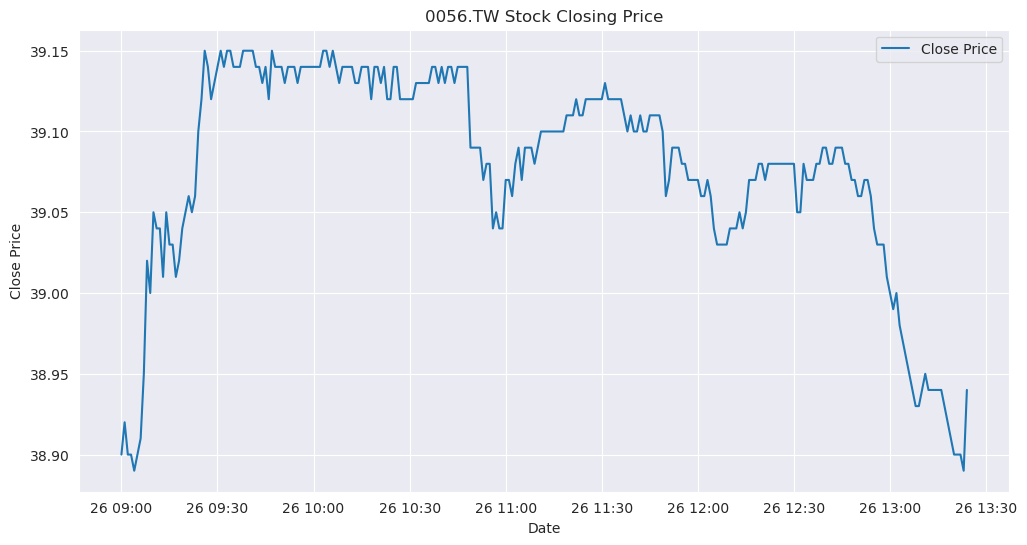

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pylab import mpl

# 设置中文显示和负号显示
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# 获取股票数据（示例：苹果公司股票）
ticker = '0056.TW'
stock_data = yf.download(ticker, period='1d', interval='1m')  # 获取1天内每分钟的数据

# 显示数据
print(stock_data.head())

# 保存数据到本地
stock_data.to_csv("stock_data_0056.csv", encoding='gbk')

# 绘制收盘价的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.title(f'{ticker} Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()